# <center><h3>20 Newsgroups Text Classification</h3><h4> AML-2304 Natural Language Processing <br>Final Project <br> Prof. <b>Harriet Huang</b></h4></center>
## Group: Valar Morghulis
- Kishan Lakhtariya C0849341
- Harshkumar Patel C0848343
- Kanan Trivedi C0851492
- Mohammaddin Masbi C0850500

In [1]:
# Importing required libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
import collections
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
import gensim
import wordcloud
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [2]:
# Defining matplotlib library Inline
%matplotlib inline
# Defining globel size for plot
matplotlib.rcParams['figure.figsize'] = [16, 14]

In [3]:
# Fetching and Storing all data into news_dataset variable with shuffling
news_dataset = fetch_20newsgroups(subset='all',
                                  shuffle=True,
                                  remove=('headers', 'footers', 'quotes'))

In [4]:
# Printing target lables names
news_dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
# Mapping labels with its integer values (Label Encoding)
lable_map = dict((i, j) for i, j in enumerate(news_dataset.target_names))
lable_map

{0: 'alt.atheism',
 1: 'comp.graphics',
 2: 'comp.os.ms-windows.misc',
 3: 'comp.sys.ibm.pc.hardware',
 4: 'comp.sys.mac.hardware',
 5: 'comp.windows.x',
 6: 'misc.forsale',
 7: 'rec.autos',
 8: 'rec.motorcycles',
 9: 'rec.sport.baseball',
 10: 'rec.sport.hockey',
 11: 'sci.crypt',
 12: 'sci.electronics',
 13: 'sci.med',
 14: 'sci.space',
 15: 'soc.religion.christian',
 16: 'talk.politics.guns',
 17: 'talk.politics.mideast',
 18: 'talk.politics.misc',
 19: 'talk.religion.misc'}

In [6]:
# Converting train dataset into pandas dataframe and storing into train_df variable
df = pd.DataFrame({'data': news_dataset.data, 'target': news_dataset.target})
df["target_label"] = df["target"].map(lable_map)
df.head()

data  target  \
0  \n\nI am sure some bashers of Pens fans are pr...      10   
1  My brother is in the market for a high-perform...       3   
2  \n\n\n\n\tFinally you said what you dream abou...      17   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...       3   
4  1)    I have an old Jasmine drive which I cann...       4   

               target_label  
0          rec.sport.hockey  
1  comp.sys.ibm.pc.hardware  
2     talk.politics.mideast  
3  comp.sys.ibm.pc.hardware  
4     comp.sys.mac.hardware

In [7]:
df.shape

(18846, 3)

## Data Exploration
Performing Data Exploration to know the dataset better to select best features

In [8]:
# Printing dataset
df

data  target  \
0      \n\nI am sure some bashers of Pens fans are pr...      10   
1      My brother is in the market for a high-perform...       3   
2      \n\n\n\n\tFinally you said what you dream abou...      17   
3      \nThink!\n\nIt's the SCSI card doing the DMA t...       3   
4      1)    I have an old Jasmine drive which I cann...       4   
...                                                  ...     ...   
18841  DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...      13   
18842  \nNot in isolated ground recepticles (usually ...      12   
18843  I just installed a DX2-66 CPU in a clone mothe...       3   
18844  \nWouldn't this require a hyper-sphere.  In 3-...       1   
18845  After a tip from Gary Crum (crum@fcom.cc.utah....       7   

                   target_label  
0              rec.sport.hockey  
1      comp.sys.ibm.pc.hardware  
2         talk.politics.mideast  
3      comp.sys.ibm.pc.hardware  
4         comp.sys.mac.hardware  
...                         ...  
18841                   sci.med  
18842           sci.electronics  
18843  comp.sys.ibm.pc.hardware  
18844             comp.graphics  
18845                 rec.autos  

[18846 rows x 3 columns]

In [9]:
# Dataset Information with columns and it's types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   data          18846 non-null  object
 1   target        18846 non-null  int64 
 2   target_label  18846 non-null  object
dtypes: int64(1), object(2)
memory usage: 441.8+ KB


In [10]:
# Using describe fuction to get statstics of dataset like Mean value, Standard Daviation
df.describe()

target
count  18846.000000
mean       9.293166
std        5.562798
min        0.000000
25%        5.000000
50%        9.000000
75%       14.000000
max       19.000000

In [11]:
# Getting the exact count of Labels
df.target_label.value_counts()

rec.sport.hockey            999
soc.religion.christian      997
rec.motorcycles             996
rec.sport.baseball          994
sci.crypt                   991
rec.autos                   990
sci.med                     990
comp.windows.x              988
sci.space                   987
comp.os.ms-windows.misc     985
sci.electronics             984
comp.sys.ibm.pc.hardware    982
misc.forsale                975
comp.graphics               973
comp.sys.mac.hardware       963
talk.politics.mideast       940
talk.politics.guns          910
alt.atheism                 799
talk.politics.misc          775
talk.religion.misc          628
Name: target_label, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'rec.sport.hockey'),
  Text(1, 0, 'soc.religion.christian'),
  Text(2, 0, 'rec.motorcycles'),
  Text(3, 0, 'rec.sport.baseball'),
  Text(4, 0, 'sci.crypt'),
  Text(5, 0, 'rec.autos'),
  Text(6, 0, 'sci.med'),
  Text(7, 0, 'comp.windows.x'),
  Text(8, 0, 'sci.space'),
  Text(9, 0, 'comp.os.ms-windows.misc'),
  Text(10, 0, 'sci.electronics'),
  Text(11, 0, 'comp.sys.ibm.pc.hardware'),
  Text(12, 0, 'misc.forsale'),
  Text(13, 0, 'comp.graphics'),
  Text(14, 0, 'comp.sys.mac.hardware'),
  Text(15, 0, 'talk.politics.mideast'),
  Text(16, 0, 'talk.politics.guns'),
  Text(17, 0, 'alt.atheism'),
  Text(18, 0, 'talk.politics.misc'),
  Text(19, 0, 'talk.religion.misc')])

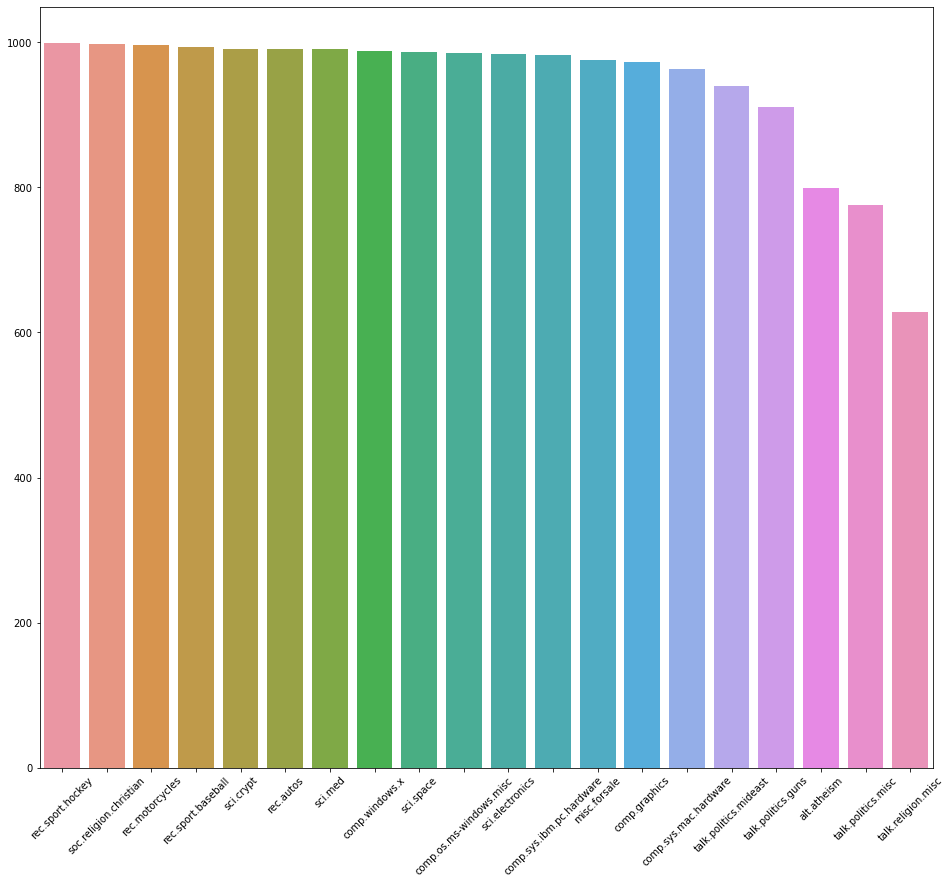

In [12]:
# Ploting interactive graph of Label counts
sns.barplot(x=df["target_label"].value_counts().index,
            y=df["target_label"].value_counts().to_numpy())
plt.xticks(rotation=45)

## Preprocessing
- Performing pre-processing steps to convert text data into meaning full data to make model accurate

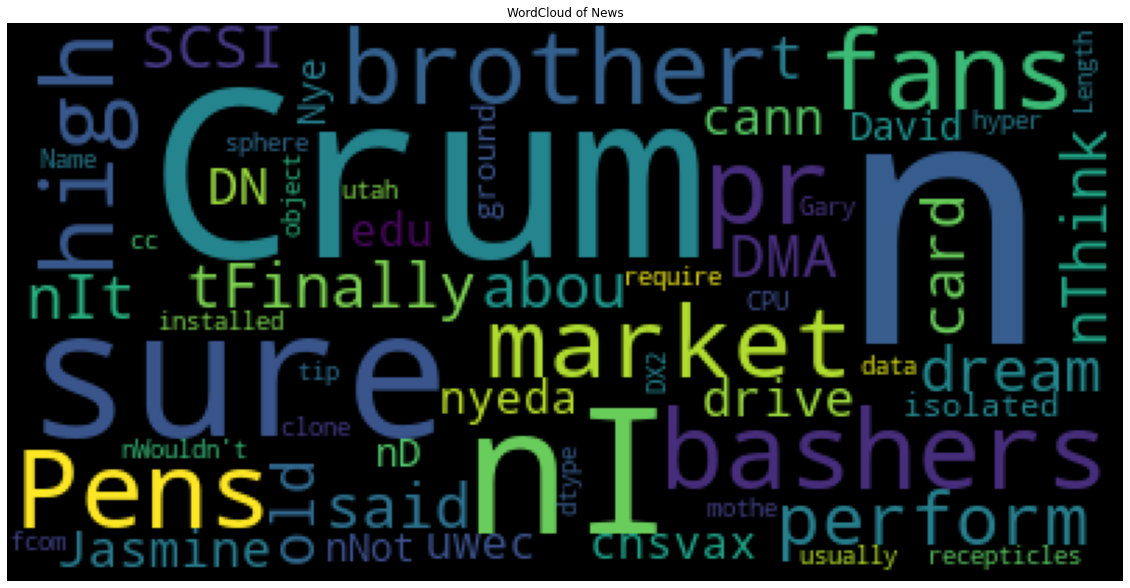

In [13]:
# plot word count for data
wc = wordcloud.WordCloud()
wc.generate(str(df['data']))
fig = plt.figure(figsize=[20, 22])
plt.title('WordCloud of News')
plt.axis('off')
plt.imshow(wc)
plt.show()

In [14]:
# Converting text paragraph into tokens using nltk.work_tokenize function and also removing special charecters and un-usefull text
# And returning tokens list
def tokenize(data):
    tokens = nltk.word_tokenize(data)
    return [word for word in tokens if word.isalpha()]

In [15]:
# Applying tokenize function to data column of dataset and storing results into column name tokenized
df['tokenized'] = df.apply(lambda x: tokenize(x['data']), axis=1)
df.head()

data  target  \
0  \n\nI am sure some bashers of Pens fans are pr...      10   
1  My brother is in the market for a high-perform...       3   
2  \n\n\n\n\tFinally you said what you dream abou...      17   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...       3   
4  1)    I have an old Jasmine drive which I cann...       4   

               target_label                                          tokenized  
0          rec.sport.hockey  [I, am, sure, some, bashers, of, Pens, fans, a...  
1  comp.sys.ibm.pc.hardware  [My, brother, is, in, the, market, for, a, vid...  
2     talk.politics.mideast  [Finally, you, said, what, you, dream, about, ...  
3  comp.sys.ibm.pc.hardware  [Think, It, the, SCSI, card, doing, the, DMA, ...  
4     comp.sys.mac.hardware  [I, have, an, old, Jasmine, drive, which, I, c...

In [16]:
# Definning function to remove english stopwords from tokenized data with the help of stopwords function of NLTK
def remove_stopword(data):

    stopword = stopwords.words("english")
    return [word for word in data if not word in stopword]

In [17]:
# Appling remove_stopword function to column tokenized of dataset and storing returned values into stopword_removed column

df['stopword_removed'] = df.apply(lambda x: remove_stopword(x['tokenized']),
                                  axis=1)
df[["data", "stopword_removed"]].head()

data  \
0  \n\nI am sure some bashers of Pens fans are pr...   
1  My brother is in the market for a high-perform...   
2  \n\n\n\n\tFinally you said what you dream abou...   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...   
4  1)    I have an old Jasmine drive which I cann...   

                                    stopword_removed  
0  [I, sure, bashers, Pens, fans, pretty, confuse...  
1  [My, brother, market, video, card, supports, V...  
2  [Finally, said, dream, Mediterranean, That, ne...  
3  [Think, It, SCSI, card, DMA, transfers, NOT, d...  
4  [I, old, Jasmine, drive, I, use, new, system, ...

In [18]:
# Converting words to it's root form using stemming technique
# Word stemming using PorterStemmer function of NLTK
# And return the stemmed word list


def stemming(data):

    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in data]

In [19]:
# Appling stemming function to dataset with column name stopword_removed

df['stemmed_words'] = df.apply(lambda x: stemming(x['stopword_removed']),
                               axis=1)
df[['data', 'stemmed_words']].head()

data  \
0  \n\nI am sure some bashers of Pens fans are pr...   
1  My brother is in the market for a high-perform...   
2  \n\n\n\n\tFinally you said what you dream abou...   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...   
4  1)    I have an old Jasmine drive which I cann...   

                                       stemmed_words  
0  [i, sure, basher, pen, fan, pretti, confus, la...  
1  [my, brother, market, video, card, support, ve...  
2  [final, said, dream, mediterranean, that, new,...  
3  [think, it, scsi, card, dma, transfer, not, di...  
4  [i, old, jasmin, drive, i, use, new, system, m...

In [20]:
# lemmatization also comvert words to its root form
# But the only difference between lemmatization and stemmeing is that stemming just removes or stems the last few characters of a word, often leading to incorrect meanings and spelling.
# lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma.


def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in data]

In [21]:
df['lemmatized_words'] = df.apply(lambda x: stemming(x['stopword_removed']),
                                  axis=1)
df[['data', 'lemmatized_words']].head()

data  \
0  \n\nI am sure some bashers of Pens fans are pr...   
1  My brother is in the market for a high-perform...   
2  \n\n\n\n\tFinally you said what you dream abou...   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...   
4  1)    I have an old Jasmine drive which I cann...   

                                    lemmatized_words  
0  [i, sure, basher, pen, fan, pretti, confus, la...  
1  [my, brother, market, video, card, support, ve...  
2  [final, said, dream, mediterranean, that, new,...  
3  [think, it, scsi, card, dma, transfer, not, di...  
4  [i, old, jasmin, drive, i, use, new, system, m...

In [22]:
# Function that join and return lemmatized words to string.
def word_rejoing(data):
    return (" ".join(data))

In [23]:
# Appling word_rejoing function to lemmatized_words and
# Stroing final string to dataframe with column name final_string
df['final_string'] = df.apply(lambda x: word_rejoing(x['lemmatized_words']),
                              axis=1)
df[['data', 'final_string']].head()

data  \
0  \n\nI am sure some bashers of Pens fans are pr...   
1  My brother is in the market for a high-perform...   
2  \n\n\n\n\tFinally you said what you dream abou...   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...   
4  1)    I have an old Jasmine drive which I cann...   

                                        final_string  
0  i sure basher pen fan pretti confus lack kind ...  
1  my brother market video card support vesa loca...  
2  final said dream mediterranean that new the ar...  
3  think it scsi card dma transfer not disk the s...  
4  i old jasmin drive i use new system my underst...

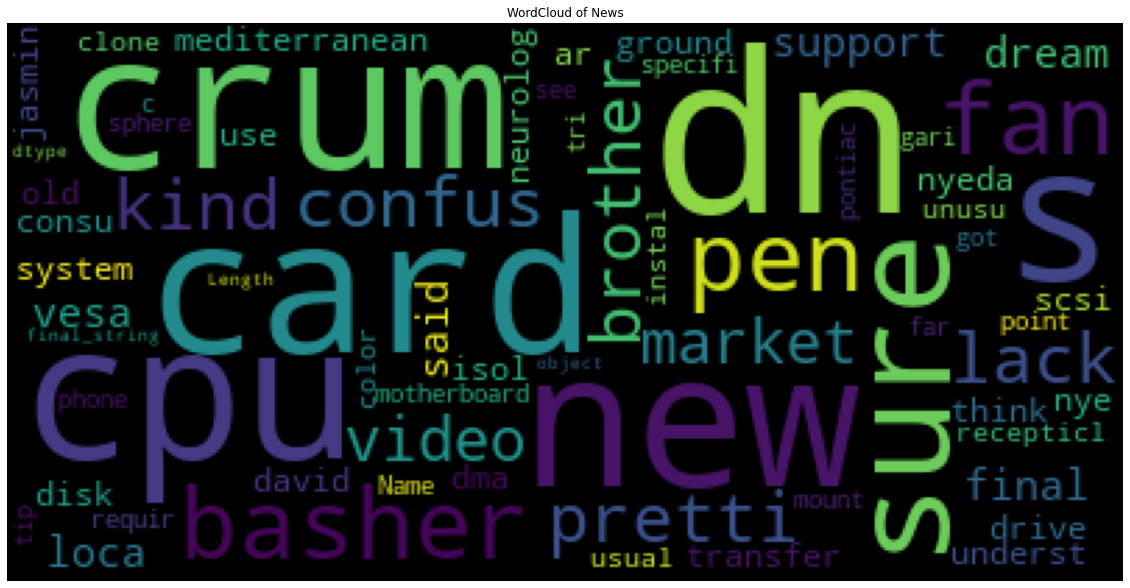

In [24]:
# plot wordcloud for final_string
wc = wordcloud.WordCloud()
wc.generate(str(df['final_string']))
fig = plt.figure(figsize=[20, 22])
plt.title('WordCloud of News')
plt.axis('off')
plt.imshow(wc)
plt.show()

In [25]:
temp = df["lemmatized_words"].to_numpy()
words = []
for lst in temp:
    words.extend(lst)

word_counts = collections.Counter(words)
word_counts = dict(sorted(word_counts.items(), key=lambda x: x[1],
                          reverse=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 [Text(0, 0, 'i'),
  Text(1, 0, 'the'),
  Text(2, 0, 'use'),
  Text(3, 0, 'would'),
  Text(4, 0, 'one'),
  Text(5, 0, 'it'),
  Text(6, 0, 'x'),
  Text(7, 0, 'get'),
  Text(8, 0, 'like'),
  Text(9, 0, 'peopl'),
  Text(10, 0, 'know'),
  Text(11, 0, 'if'),
  Text(12, 0, 'm'),
  Text(13, 0, 'time'),
  Text(14, 0, 'also'),
  Text(15, 0, 'think'),
  Text(16, 0, 'a'),
  Text(17, 0, 'thi'),
  Text(18, 0, 'say'),
  Text(19, 0, 'make'),
  Text(20, 0, 'go'),
  Text(21, 0, 'work'),
  Text(22, 0, 'could'),
  Text(23, 0, 'max'),
  Text(24, 0, 'new'),
  Text(

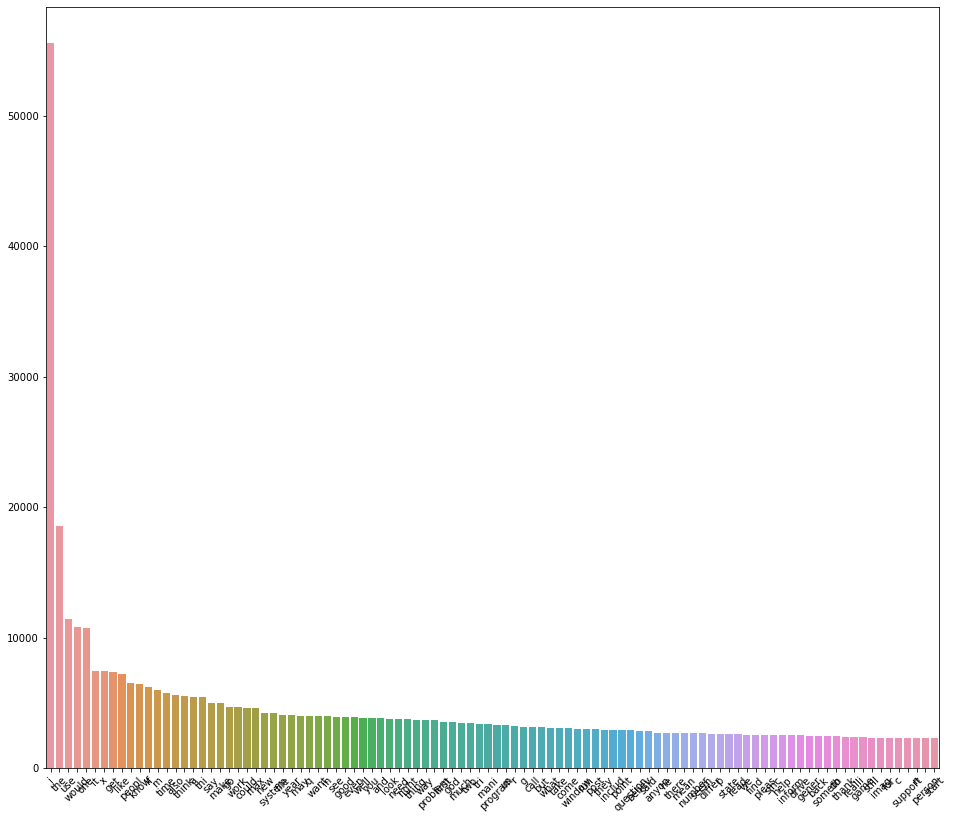

In [26]:
# Ploting first 100 most frequent words
sns.barplot(x=np.array(list(word_counts.keys()))[:100],
            y=np.array(list(word_counts.values()))[:100])
plt.xticks(rotation=45)

# Word Vectorization
- Word Vectorization is technique to convert words to numerical form to perform model traing on text based data
- There is 3 word vectorization technique mostly used 
    - 1. Bag Of Words (BOW)
    - 2. Term Frequency-Inverse document Frequency (TF-IDF)
    - 3. Word2Vec
- Here I am going to train model using 2 methods TF-IDF and Word2Vec to chech which method is sutable for Multi-Class Classification Problem

## TF-IDF
- Term Frequency-Inverce Document Frequency
- Term Frequency-Inverse Document Frequency is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.
- This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.


In [27]:
# to store the result of traning
tf_idf_train_acc = {}
# to store the result of test data
tf_idf_test_acc = {}

In [28]:
# Creating instance of TfidfVectorzer function of sklearn library
tf_idf = TfidfVectorizer()
# Converting final_strings to its meaning full words vectors from dataframe
# Storing final traing data to X variable
X = tf_idf.fit_transform(df["final_string"])
# Storing Labels to Y variable
Y = df["target"]
# Printing Shape of data
X.shape

(18846, 57689)

In [29]:
# Displaying average non-zero values from dataset
X.nnz / float(X.shape[0])

61.29640241961159

In [30]:
# Printing array of X
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
# t-SNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=300, n_iter=1800)
# tsne to our document vectors
componets = tsne.fit_transform(X)

/Users/kishan/opt/miniforge3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


/Users/kishan/opt/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


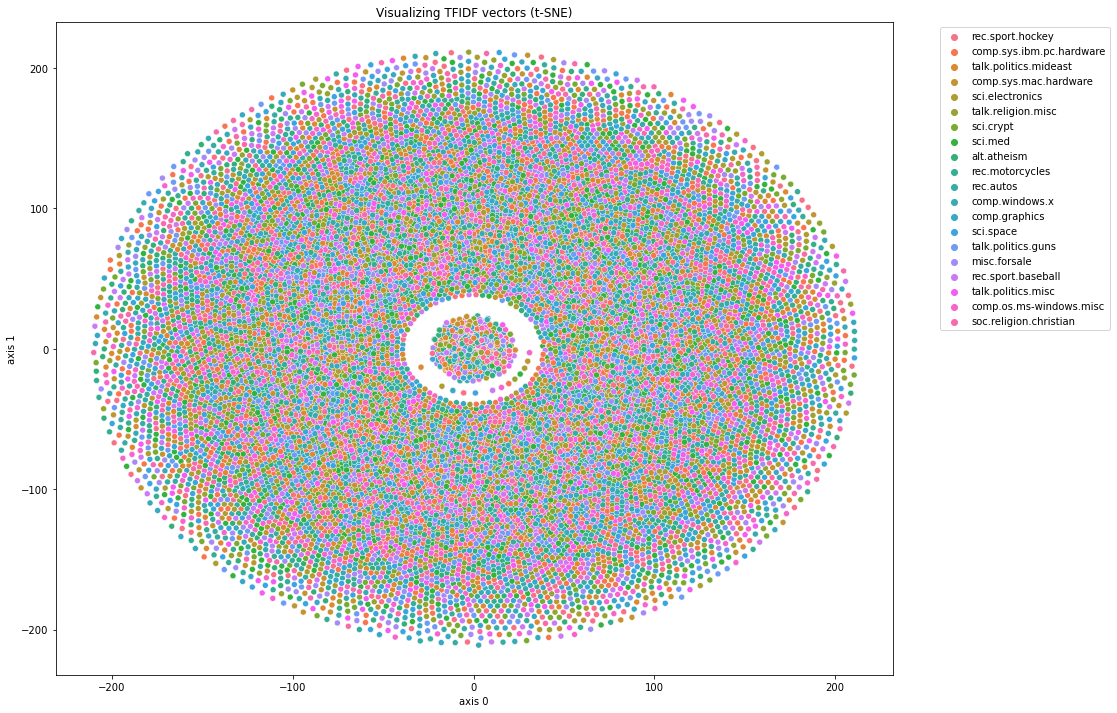

In [32]:
# plot TI-IDF vectors for final_string data
def plot_TFIDF_embeddings(embedding, title):
    fig = plt.figure(figsize=[15, 12])
    ax = sns.scatterplot(embedding[:, 0],
                         embedding[:, 1],
                         hue=df['target_label'])
    plt.title(title)
    plt.xlabel('axis 0')
    plt.ylabel('axis 1')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.show()


plot_TFIDF_embeddings(componets, 'Visualizing TFIDF vectors (t-SNE)')

In [33]:
# Spliting dataset into trian test data with ratio 80:20 with suffuling
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=42)

### Naive Bayes Classifier

In [34]:
# Defining naive bayes classifier model with MultinomialNB function of sklearn
# fitting train data into model

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

In [35]:
# getting training accuracy of model
y_pred = naive_bayes_classifier.predict(X_train)
NB_train_acc = metrics.accuracy_score(y_train, y_pred)
print("Train Accuracy : ", NB_train_acc)
tf_idf_train_acc["NaiveBayes"] = NB_train_acc

# Performing prediction on test dataset
y_pred = naive_bayes_classifier.predict(X_test)
NB_test_acc = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy : ", NB_test_acc)
tf_idf_test_acc["NaiveBayes"] = NB_test_acc

Train Accuracy :  0.8114884584770496
Test Accuracy :  0.6896551724137931


In [36]:
# Getting full report of model classification that how it performed
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.21      0.32       151
           1       0.66      0.63      0.65       202
           2       0.70      0.61      0.65       195
           3       0.49      0.77      0.60       183
           4       0.86      0.64      0.74       205
           5       0.83      0.80      0.82       215
           6       0.84      0.62      0.71       193
           7       0.82      0.71      0.76       196
           8       0.50      0.79      0.61       168
           9       0.95      0.82      0.88       211
          10       0.87      0.90      0.89       198
          11       0.62      0.83      0.71       201
          12       0.81      0.63      0.71       202
          13       0.89      0.78      0.83       194
          14       0.80      0.80      0.80       189
          15       0.38      0.95      0.54       202
          16       0.70      0.79      0.74       188
          17       0.74    

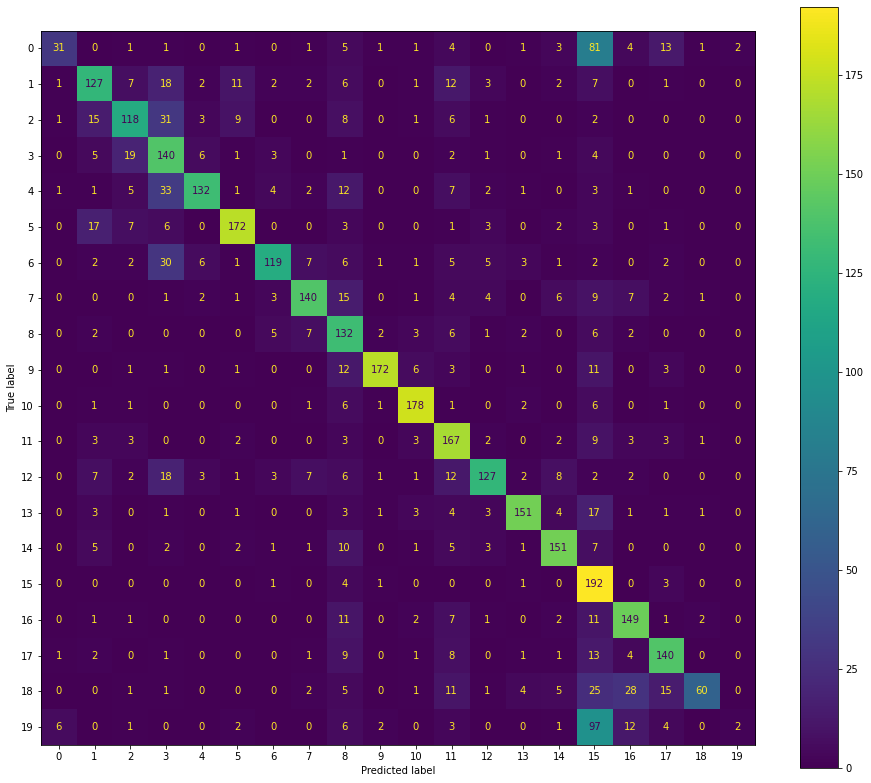

In [37]:
# Ploting confusion matrix with interective graphics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

cm_display.plot()
plt.show()

### Stochastic Gradient Descent(SGD) Classifier

In [38]:
# Creating model of SGD Classifier with SGDClassifier class of sklearn
# Fitting the traing dataset into model
sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42)
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.001, random_state=42)

In [39]:
# getting training accuracy of model
y_pred = sgd.predict(X_train)
SGD_train_acc = metrics.accuracy_score(y_train, y_pred)
print("Train Accuracy : ", SGD_train_acc)
tf_idf_train_acc["SGD"] = SGD_train_acc

# Performing prediction on test dataset
y_pred = sgd.predict(X_test)
SGD_test_acc = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy : ", SGD_test_acc)
tf_idf_test_acc["SGD"] = SGD_test_acc

Train Accuracy :  0.857389227911913
Test Accuracy :  0.7026525198938992


In [40]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.42      0.51       151
           1       0.69      0.61      0.65       202
           2       0.63      0.68      0.66       195
           3       0.59      0.62      0.61       183
           4       0.80      0.67      0.73       205
           5       0.81      0.76      0.79       215
           6       0.66      0.72      0.69       193
           7       0.76      0.76      0.76       196
           8       0.48      0.79      0.60       168
           9       0.87      0.82      0.85       211
          10       0.78      0.89      0.83       198
          11       0.74      0.79      0.76       201
          12       0.77      0.57      0.65       202
          13       0.76      0.86      0.81       194
          14       0.74      0.81      0.78       189
          15       0.63      0.85      0.73       202
          16       0.70      0.73      0.71       188
          17       0.70    

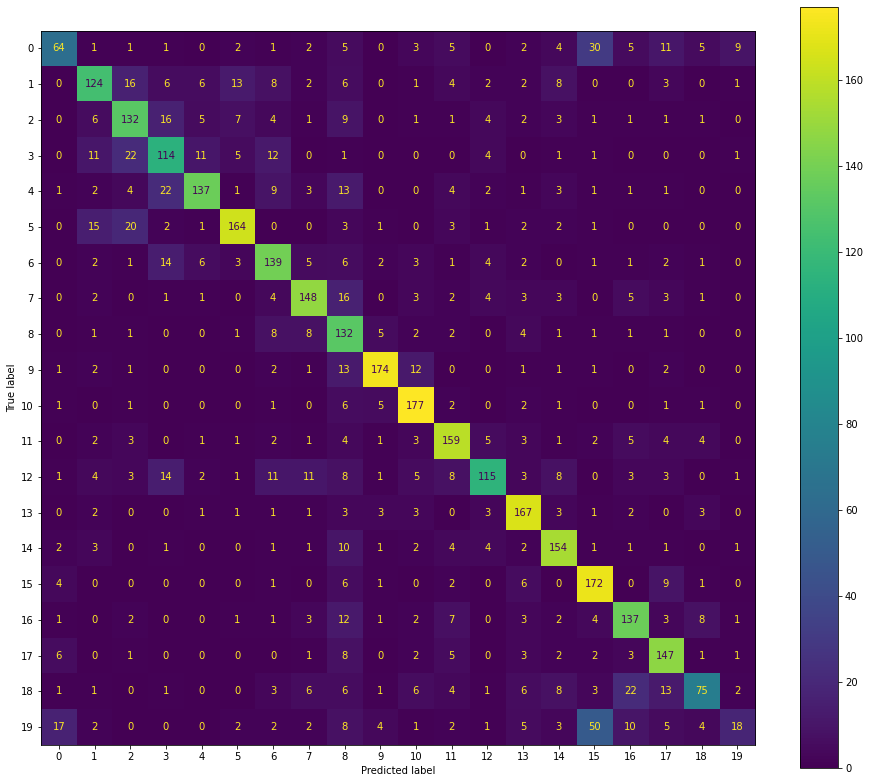

In [41]:
# Ploting confusion matrix with interective graphics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

cm_display.plot()
plt.show()

## Support Vector Machine(SVM) Classifier

In [42]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [43]:
# getting training accuracy of model
y_pred = svm.predict(X_train)
SVM_train_acc = metrics.accuracy_score(y_train, y_pred)
print("Train Accuracy : ", SVM_train_acc)
tf_idf_train_acc["SVM"] = SVM_train_acc

# Performing prediction on test dataset
y_pred = svm.predict(X_test)
SVM_test_acc = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy : ", SVM_test_acc)
tf_idf_test_acc["SVM"] = SVM_test_acc

Train Accuracy :  0.964181480498806
Test Accuracy :  0.7124668435013263


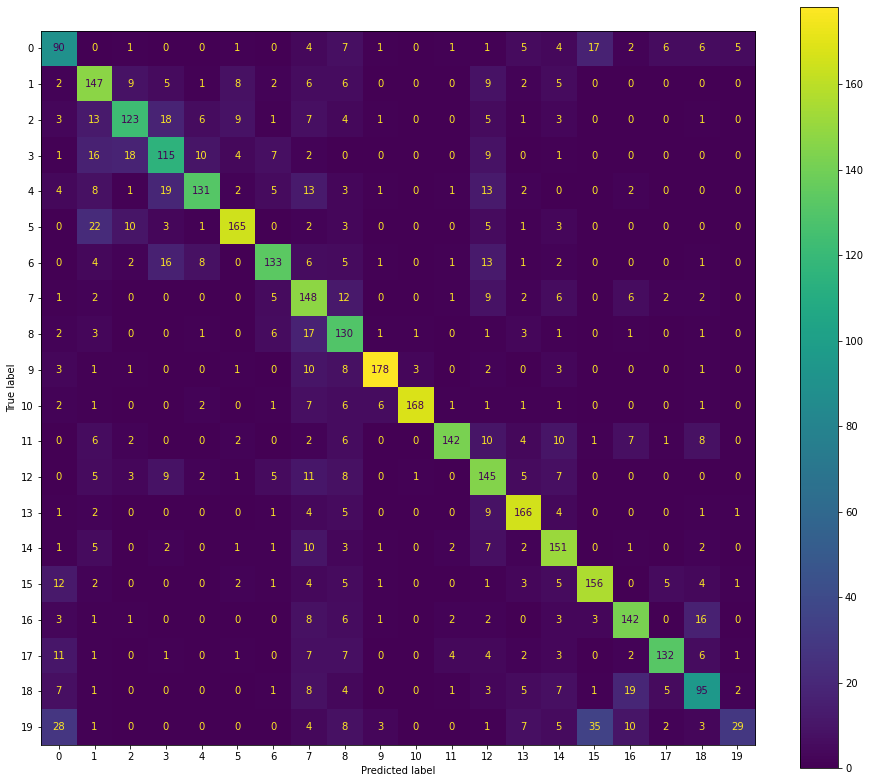

In [44]:
# Ploting confusion matrix with interective graphics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

cm_display.plot()
plt.show()

In [45]:
tf_idf_test_acc, tf_idf_train_acc

({'NaiveBayes': 0.6896551724137931,
  'SGD': 0.7026525198938992,
  'SVM': 0.7124668435013263},
 {'NaiveBayes': 0.8114884584770496,
  'SGD': 0.857389227911913,
  'SVM': 0.964181480498806})

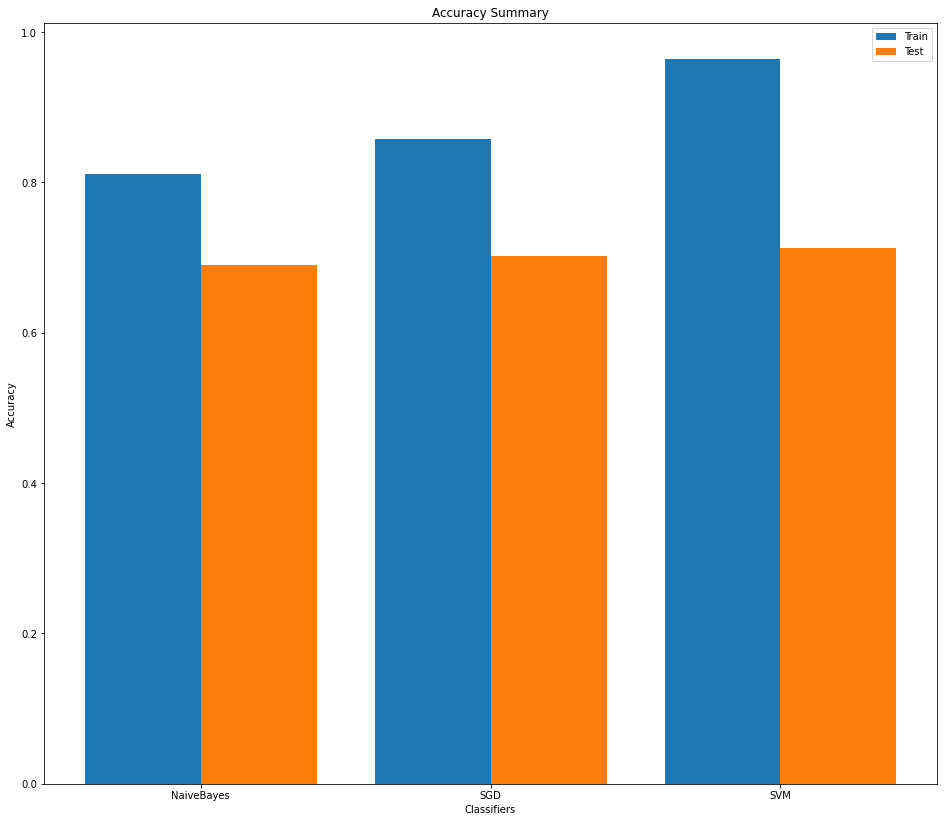

In [54]:
X = list(tf_idf_train_acc.keys())
train = list(tf_idf_train_acc.values())
test = list(tf_idf_test_acc.values())

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, train, 0.4, label='Train')
plt.bar(X_axis + 0.2, test, 0.4, label='Test')
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy Summary")
plt.legend()
plt.show()

#### Prediction Result
- From all three classification models, Support Vector Machine Classifier performed well with train accuracy of 96% and test accuracy of 71% other than Naïve Bayes with 81%-69% Train-Test and SGD with 85%-70% train-test accuracy.

## Word2Vec
- Word2vec is a group of related models that are used to produce word embeddings. Word2vec is a technique for natural language processing to convert words into vectors. The word2vec algorithm uses a neural network model to learn word associations from a large corpus of text. Once trained, such a model can detect synonymous words or suggest different words for a partial sentence.

In [48]:
w2v_train_acc = {}
w2v_test_acc = {}

In [49]:
# Splitting the lemmatized_wrods list into train test dataset
X_train, X_test, y_train, y_test = train_test_split(df['lemmatized_words'],
                                                    df['target'],
                                                    test_size=0.2)

In [55]:
# Train the word2vec model with vector_size 800 and window size 600
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=500,
                                   window=100,
                                   min_count=20)

In [56]:
def create_tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in list(model.wv.index_to_key):
        tokens.append(model.wv[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=40,
                      n_components=2,
                      init='pca',
                      n_iter=1000,
                      random_state=20)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(20, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/Users/kishan/opt/miniforge3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/kishan/opt/miniforge3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


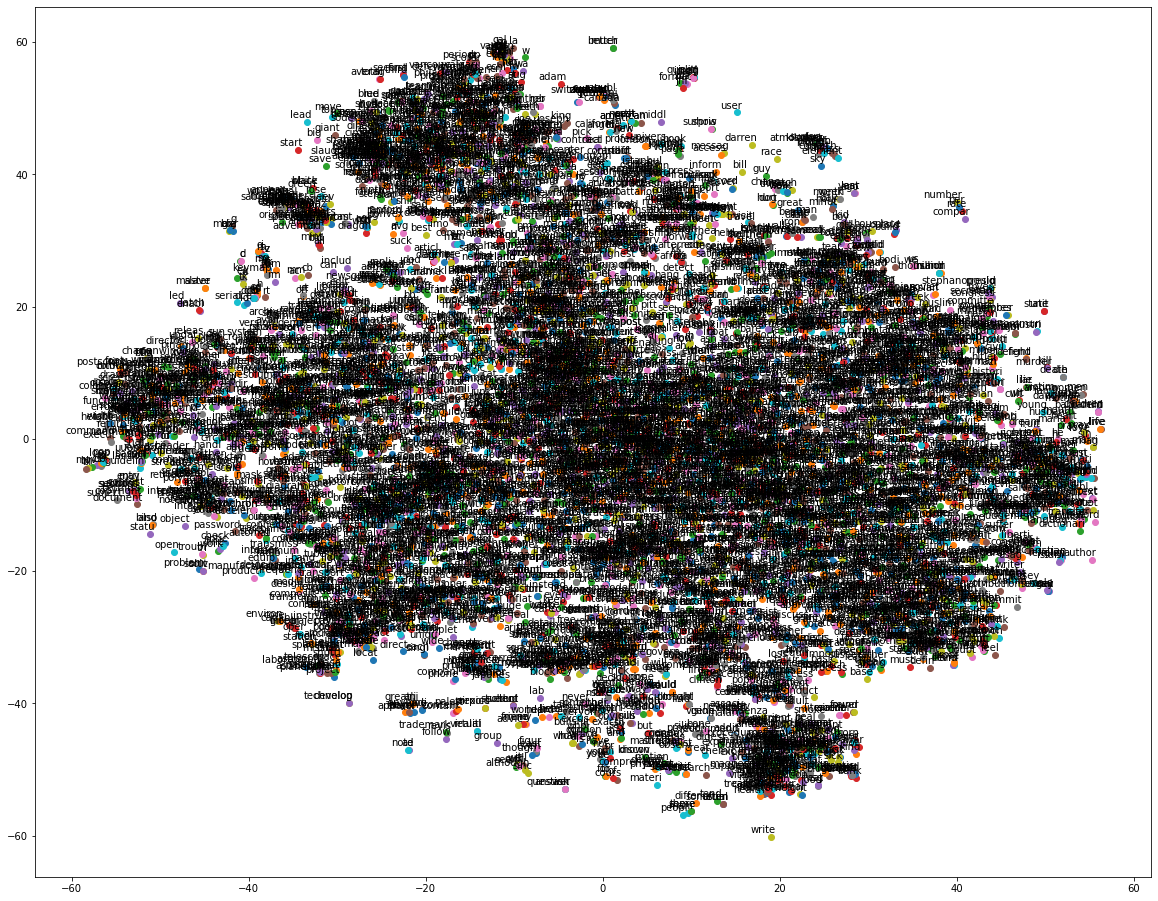

In [57]:
create_tsne_plot(w2v_model)

In [58]:
# Generating aggregated sentence vectors based on the word vectors for each word in the sentence
words = set(w2v_model.wv.index_to_key)
X_train_vect = np.array(
    [np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_train])
X_test_vect = np.array(
    [np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_test])

/var/folders/y6/4njssq5s2_764zsxh2lpvlvm0000gn/T/ipykernel_3236/2421843446.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_vect = np.array(
/var/folders/y6/4njssq5s2_764zsxh2lpvlvm0000gn/T/ipykernel_3236/2421843446.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_vect = np.array(


In [60]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(500, dtype=float))

X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(500, dtype=float))

### Stochastic Gradient Descent(SGD) Classifier

In [61]:
# Creating SGD Classifier model and feeding training data to it
sgd = SGDClassifier()
sgd.fit(X_train_vect_avg, y_train)

SGDClassifier()

In [62]:
# getting training accuracy of model
y_pred = sgd.predict(X_train_vect_avg)
SGD_train_acc = metrics.accuracy_score(y_train, y_pred)
print("Train Accuracy : ", SGD_train_acc)
w2v_train_acc["SGD"] = SGD_train_acc

# Performing prediction on test dataset
y_pred = sgd.predict(X_test_vect_avg)
SGD_test_acc = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy : ", SGD_test_acc)
w2v_test_acc["SGD"] = SGD_test_acc

Train Accuracy :  0.599230565136641
Test Accuracy :  0.5952254641909814


In [63]:
# Displaying report of prediction
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.37      0.41       161
           1       0.65      0.54      0.59       190
           2       0.51      0.67      0.58       201
           3       0.51      0.38      0.44       208
           4       0.50      0.51      0.51       172
           5       0.73      0.66      0.69       202
           6       0.47      0.73      0.57       210
           7       0.72      0.53      0.61       224
           8       0.79      0.49      0.61       217
           9       0.82      0.56      0.67       193
          10       0.69      0.83      0.75       208
          11       0.61      0.73      0.66       171
          12       0.42      0.63      0.51       185
          13       0.63      0.77      0.70       195
          14       0.74      0.60      0.66       195
          15       0.57      0.76      0.65       182
          16       0.57      0.71      0.63       183
          17       0.72    

### RandomForest Classifier

In [64]:
# Train data with randomforest classifer
rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect_avg, y_train)

In [65]:
# getting training accuracy of model
y_pred = rf_model.predict(X_train_vect_avg)
rf_train_acc = metrics.accuracy_score(y_train, y_pred)
print("Train Accuracy : ", rf_train_acc)
w2v_train_acc["RandomForest"] = rf_train_acc

# Performing prediction on test dataset
y_pred = rf_model.predict(X_test_vect_avg)
rf_test_acc = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy : ", rf_test_acc)
w2v_test_acc["RandomForest"] = rf_test_acc

Train Accuracy :  0.9710798620323693
Test Accuracy :  0.6127320954907162


In [66]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.45      0.44       161
           1       0.55      0.67      0.61       190
           2       0.56      0.55      0.56       201
           3       0.53      0.43      0.48       208
           4       0.48      0.52      0.50       172
           5       0.75      0.71      0.73       202
           6       0.71      0.74      0.72       210
           7       0.47      0.57      0.52       224
           8       0.55      0.62      0.58       217
           9       0.69      0.66      0.68       193
          10       0.80      0.69      0.74       208
          11       0.71      0.70      0.71       171
          12       0.58      0.55      0.57       185
          13       0.68      0.76      0.72       195
          14       0.73      0.63      0.68       195
          15       0.62      0.79      0.69       182
          16       0.62      0.67      0.64       183
          17       0.76    

## Support Vector Machine(SVM) Classifier

In [67]:
svm = SVC()
svm.fit(X_train_vect_avg, y_train)

SVC()

In [68]:
# getting training accuracy of model
y_pred = svm.predict(X_train_vect_avg)
SVM_train_acc = metrics.accuracy_score(y_train, y_pred)
print("Train Accuracy : ", SVM_train_acc)
w2v_train_acc["SVM"] = SVM_train_acc

# Performing prediction on test dataset
y_pred = svm.predict(X_test_vect_avg)
SVM_test_acc = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy : ", SVM_test_acc)
w2v_test_acc["SVM"] = SVM_test_acc

Train Accuracy :  0.7263863093658796
Test Accuracy :  0.6209549071618037


In [69]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.43      0.42       161
           1       0.57      0.67      0.62       190
           2       0.58      0.59      0.59       201
           3       0.56      0.40      0.47       208
           4       0.52      0.58      0.55       172
           5       0.74      0.69      0.71       202
           6       0.76      0.74      0.75       210
           7       0.48      0.59      0.53       224
           8       0.51      0.61      0.55       217
           9       0.69      0.71      0.70       193
          10       0.82      0.74      0.78       208
          11       0.76      0.70      0.73       171
          12       0.55      0.56      0.56       185
          13       0.75      0.76      0.75       195
          14       0.75      0.66      0.70       195
          15       0.59      0.79      0.68       182
          16       0.60      0.68      0.64       183
          17       0.73    

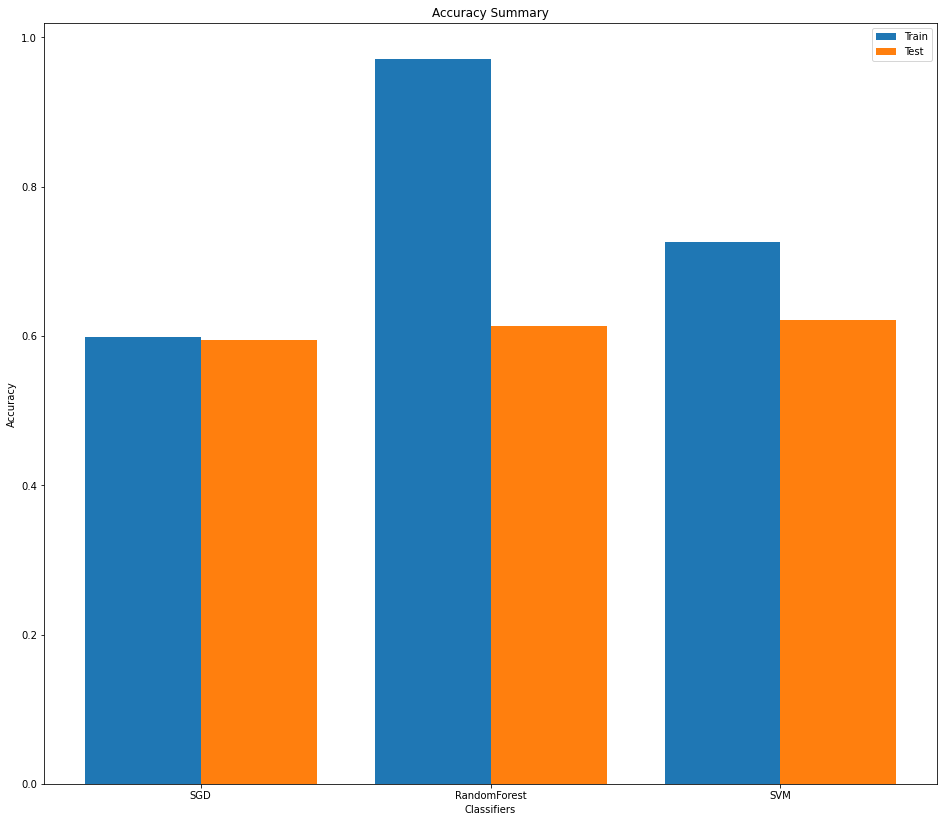

In [71]:
# Comapring resuls of all models
X = list(w2v_train_acc.keys())
train = list(w2v_train_acc.values())
test = list(w2v_test_acc.values())

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, train, 0.4, label='Train')
plt.bar(X_axis + 0.2, test, 0.4, label='Test')
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy Summary")
plt.legend()
plt.show()

#### Prediction report
- For the word2vec word embedding technique from all three classification models, the Support Vector Machine classifier performed well with the train-test, 73%-61% accuracy score,

# Conclusion
- To conclude we performed classification on 20 newsgroup dataset with 2 differect word embedding techniques with all text pre-processing steps with feature selection to train different models.
- We observe that for this problem TF-IDF vectorization technique performed better with 71% accuracy score with higher than Word2Vec embedding using SVM Classifier
- Because Word2Vec technique is mostly suitable for recommendation problems but this is the problem of Multiclass text classification, so for that TI-IDF is best.